In [690]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

df = pd.read_csv("../../completed/dataset_for_modeling.csv")

df.head()

,Brand,Location,Age,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand_Category
0,Hyundai,Pune,4,41000.0,Diesel,Manual,First,19,1582,126.20,5,2.602690,Mass-Market
1,Honda,Chennai,8,46000.0,Petrol,Manual,First,18,1199,88.70,5,1.704748,Executive
2,Maruti,Chennai,7,87000.0,Diesel,Manual,First,20,1248,88.76,7,1.945910,Entry-Level
3,Audi,Coimbatore,6,40670.0,Diesel,Automatic,Second,15,1968,140.80,5,2.930660,Luxury
4,Nissan,Jaipur,6,86999.0,Diesel,Manual,First,23,1461,63.10,5,1.504077,Mass-Market


## Parte 2 - Modellazione e Predizione

Nella prima parte abbiamo conosciuto il dataset, ci abbiamo lavorato modificandolo in modo da essere più adatto per questa seconda parte.

Adesso ci occuperemo della **modellazione**, gli obiettivi sono:
- **Understanding** (Approccio Statistico): utilizzo di modelli di regressione per quantificare le relazioni tra le variabili, testare ipotesi e comprendere l'impatto dei fattori in gioco;
- **Prediction** (Approccio Machine Learning): Costruire sistemi automatici in grado di stimare valori basandosi su dati nuovi mai visti oppure classificarli con l'obiettivo di generare un valore pratico;

### 2.1 Analisi Statistica e Regressione (Understanding)

Iniziamo con l'approccio statistico, l'attenzione verrà posta sulla significatività statistica e sull'interpretazione delle varie variabili (coefficienti). Non stiamo ancora cercando di fare la "miglior predizione possibile", ma di capire come le variabili si influenzano a vicenda, per questo motivo NON è necessario dividere in train set e test set.

Iniziamo utilizzando un semplice modello di regressione lineare, in seguito passeremo all'uso di un modello di regressione polinomiale.

#### Selezione delle variabili

Come abbiamo detto in precedenza, la nostra variabile target è Price (il prezzo di vendita delle auto), quindi cercheremo di capire a fondo l'impatto che hanno le varie variabili sul nostro target. Ricordiamo che è stata èrecedentemente applicata a 'price' una trasformazione logaritmica per alcuni motivi: normalizzazione della ditribuzione, riduzione degli errori, interpretazione in variazioni percentuali.

Come detto prima, i valori dei coefficienti del modello dovranno essere interpretati in modo differente, ovvero $(exp(\beta) - 1) \cdot 100$ differenza in punti percentuale sul prezzo mantenendo le altre variabili costanti, $\beta$ coefficiente.

Aggiungeremo le variabili man mano, studiando ogni volta il modello ottenuto. Inizieremo con le variabili continue per semplicità:

In [691]:
y_inference = df['Price']
vars_da_usare = ['Age', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power'] 
x_inference = df[vars_da_usare]

x_inference_final = sm.add_constant(x_inference)

model = sm.OLS(y_inference, x_inference_final).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     5595.
Date:                Sat, 10 Jan 2026   Prob (F-statistic):               0.00
Time:                        13:01:46   Log-Likelihood:                -1256.2
No. Observations:                5709   AIC:                             2524.
Df Residuals:                    5703   BIC:                             2564.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.2969      0.03

Abbiamo applicato un modello di Regressione ai nostri dati, abbiamo utilizzato il metodo dell'Ordinary Least Squares (OLS), analizziamo cosa abbiamo ottenuto.

**1. Interpretazione dei coefficienti**
- **Age (-0.1128)**: Questa è la variabile più influente. Se l'età incrementa di un unità il prezzo dell'auto subisce una diminuzione di circa **11,28%**.
- **Power (0.0081)**: Per ogni unità di potenza (bhp) in più, si ha un incremento dello **0,81%** del prezzo, sembra poco ma su tanti cavalli inizi a diventare un bel valore.
- **Engine (0.0003)**: Anche la cilindrata ha un impatto positivo e statisticamente significativo, anche se minore rispetto la potenza, **0,03%**.

**2. Analisi dei P-value**
- **Predittori Significativi (P < 0.05)**: '`intercetta`', '`Age`', '`Engine`', '`Power`' hanno tutti un p-value di 0.000, sono quindi predittori affidabili per il prezzo.
- **Predittori NON Significativi**: '`Kilometers_Driven`', incredibilmente i chilometri percorsi non sembrano infuenzare in modo significativo il prezzo. '`Mileage`', stesso discorso per il consumo di carburante.

**3. Goodness of Fit**
- **R-squared (0.831)**: il modello sembra solido, spiega l'**83,1%** della varianza del prezzo (del logaritmo).
- **Adj. R-squared (0.830)**: identico a R-squared, ci indica che non stiamo inserendo troppe variavili "superflue".

**Multicollinearità**

Inoltre vengono restituite due note, esse riguardano un pericolo di possibile multicollinearità, in cui più variabili potrebbero offrire la stessa informazione rendendo i risultati inconsistenti. Forse riguarda la possibilità che `Engine` e `Power` offrano la stessa informazione secondo il modello.

Andiamo a correggere il modello eliminando `Kilometers_Driven` e `Mileage`:

In [692]:
y_inference = df['Price']
vars_da_usare = ['Age', 'Engine', 'Power'] 
x_inference = df[vars_da_usare].copy()

x_inference_final = sm.add_constant(x_inference)

model_slr_1 = sm.OLS(y_inference, x_inference_final).fit()

print(model_slr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     9325.
Date:                Sat, 10 Jan 2026   Prob (F-statistic):               0.00
Time:                        13:01:46   Log-Likelihood:                -1256.9
No. Observations:                5709   AIC:                             2522.
Df Residuals:                    5705   BIC:                             2548.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2853      0.013     96.955      0.0

Adesso plottiamo i grafici dei residui:

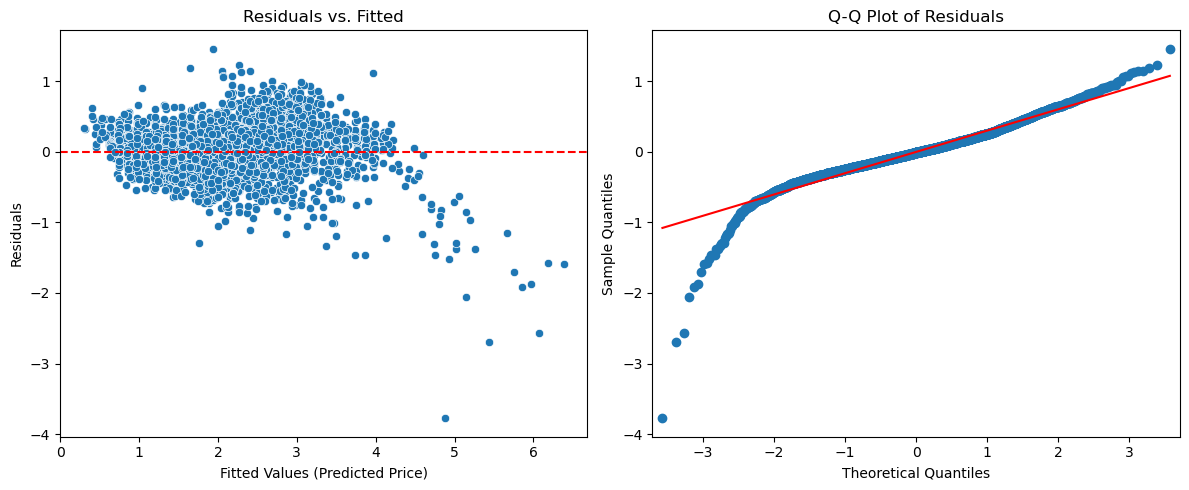

In [693]:
fitted_values = model.fittedvalues
residuals = model.resid

plt.figure(figsize=(12, 5))

# 1. Residuals vs. Fitted Plot
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(x=fitted_values, y=residuals, ax=ax1)
ax1.axhline(0, color='red', linestyle='--')
ax1.set_title('Residuals vs. Fitted')
ax1.set_xlabel('Fitted Values (Predicted Price)')
ax1.set_ylabel('Residuals')

# 2. Q-Q Plot
ax2 = plt.subplot(1, 2, 2)
sm.qqplot(residuals, line='s', ax=ax2)
ax2.set_title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

Nel grafico dei residui notiamo che la nuvola è abbastanza concentrata verso il centro fino ad un certo punto, sulla destra i punti tendono a "cadere" verso il basso. La distribuzione non è totalmente casuale, il modello sovrastima il prezzo delle auto di fascia alta, nonostrante l'applicazione della trasformazione logaritmica sul Price. Probabile underfitting.

Nel Q-Q plot i punti tendono a seguire la linea retta ma nella cosa di sinistra si discostano, forse ci sono auto vendute prezzi diversi da quelli previsti che il modello non riesce a capire.

Adesso andiamo ad aggiungere altre variabili che, come abbiamo visto precedentemente, influiscono sul prezzo. Queste che andremo ad aggiungere hanno però bisogno di essere traformate, vediamo:
- Fuel_Type: dobbiamo utilizzare la tecnica dell'one-hot-encoding, per far si che il modello possa utilizzare al meglio questa variabile per la predizione, visto che anche modificando Fuel_Type in una avriabile dummy, non essendo essa una variabile ordinale, ci sarebbero problemi.
- Transmission: stessa cosa detta per Fuel_type
- Owner_Type: essendo di per se ordinale non ci sarebbero problemi a trasformala in una semplice variabile dummy, tuttavia questo discorso vale se ipotizziamo che il cambiamento di prezzo sia lineare al passaggio tra un numero di proprietario e un altro, per questo è meglio utilizzare pure qua il one hot encoding.

In [694]:
y_inference = df['Price']

vars_da_usare = ['Age', 'Engine', 'Power', 'Fuel_Type', 'Transmission', 'Owner_Type'] 
X_inference = df[vars_da_usare].copy()

X_inference = pd.get_dummies(X_inference, columns=['Fuel_Type', 'Transmission', 'Owner_Type'], drop_first=True, dtype=int)

X_inference_final = sm.add_constant(X_inference)

model_slr_2 = sm.OLS(y_inference, X_inference_final.astype(float)).fit()

print(model_slr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     5260.
Date:                Sat, 10 Jan 2026   Prob (F-statistic):               0.00
Time:                        13:01:46   Log-Likelihood:                -589.84
No. Observations:                5709   AIC:                             1196.
Df Residuals:                    5701   BIC:                             1249.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.8306    

Analizziamo il risultato:

Abbiamo applicato un modello di Regressione ai nostri dati, abbiamo utilizzato il metodo dell'Ordinary Least Squares (OLS), analizziamo cosa abbiamo ottenuto.

**1. Interpretazione dei coefficienti**
- **Age (-0.3043)**: Rispetto a prima Age ha un impatto ancora più rilevante.
- **Engine (0.1136)**: Anche Engine ha aumentato il suo peso, un aumento della dimensione del motore di un unità favorisce un incremento del prezzo di **11,36%**.
- **Power (0.3678)**: Power si rivela essere il predittore più forte in termini positivi.
- **Fuel_Type_Petrol (-0.2150)**: indica che rispetto ad auto a Diesel, un auto a benzina costa circa il **21,50%** in meno.
- **Transmission_Manual (-0.2947)**: indica che rispetto alle auto Automatiche, quelle manuali costano il **30%** in meno.
-**Owner_Type (Second/Third)**: qui notiamo una svalutazione progressima, essere il secondo proprietario riduce il prezzo del **3,9%** mentre dal terzo in poi si riduce dell'**12,21%**.

**2. Analisi dei P-value**
- Tutte le variabili indipendenti hanno un impatto reale sul prezzo.

**Gooodness of Fit**
- **R-squared (0.866)**: questo valore si è alzato rispetto a prima, adesso riusciamo a spiegare circa l'**86%** della varianza nel dataset
- **Adj. R-squared (0.866)**: il valore è identico ad R-squared, non ci sono variabili inutili.


Vediamo adesso se l'aggiunta di uno tra Kilometers_Driven o Mileage o entrambi è ancora inutile oppure se è cambiato qualcosa

In [695]:
from sklearn.preprocessing import StandardScaler

y_inference = df['Price']

vars_da_usare = ['Age', 'Engine', 'Power', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Kilometers_Driven', 'Mileage'] 
X_inference = df[vars_da_usare].copy()

X_inference = pd.get_dummies(X_inference, columns=['Fuel_Type', 'Transmission', 'Owner_Type'], drop_first=True, dtype=int)

cols_to_scale = ['Age', 'Engine', 'Power', 'Kilometers_Driven', 'Mileage']
scaler = StandardScaler()
X_inference[cols_to_scale] = scaler.fit_transform(X_inference[cols_to_scale])

X_inference_final = sm.add_constant(X_inference)

model_slr_3 = sm.OLS(y_inference, X_inference_final.astype(float)).fit()

print(model_slr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     4360.
Date:                Sat, 10 Jan 2026   Prob (F-statistic):               0.00
Time:                        13:01:46   Log-Likelihood:                -430.45
No. Observations:                5709   AIC:                             880.9
Df Residuals:                    5699   BIC:                             947.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.3965    

Abbiamo aggiunto nuovamente 'Mileage' e 'Kilometers_Driven' ma a differenza di prima non c'è più il problema della multicollinearità, questo perché avendo aggiunto altri predittori, essi potrebbero aver spiegato della varianza che prima sembrava la stessa tra le prime.

Andiamo ad aggiungere la variabile 'Brand_Category', vediamo:

In [696]:
y_inference = df['Price']

vars_da_usare = ['Age', 'Engine', 'Power', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Kilometers_Driven', 'Mileage', 'Brand_Category'] 
X_inference = df[vars_da_usare].copy()

X_inference = pd.get_dummies(X_inference, columns=['Fuel_Type', 'Transmission', 'Owner_Type', 'Brand_Category'], drop_first=True, dtype=int)

X_inference_final = sm.add_constant(X_inference)

model_slr_4 = sm.OLS(y_inference, X_inference_final.astype(float)).fit()

print(model_slr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     4003.
Date:                Sat, 10 Jan 2026   Prob (F-statistic):               0.00
Time:                        13:01:46   Log-Likelihood:                 286.76
No. Observations:                5709   AIC:                            -545.5
Df Residuals:                    5695   BIC:                            -452.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

L'aggiunta di Brand migliora di molto le performace, riusciamo a spiegare gran parte del modello, tuttavia abbiamo introdotto multicollinearità, in futuro quando andremo a verificare le performance sui dati nuovi e mai visti, l'uso del Regressore Lasso potrà rimuovere in automatico le variabili dummy che hanno meno significatività, per ridurre questo pericolo di multicollinearità. Per il momento converrebbe rimuovere Brand.

Andiamo a plottare i due grafici:

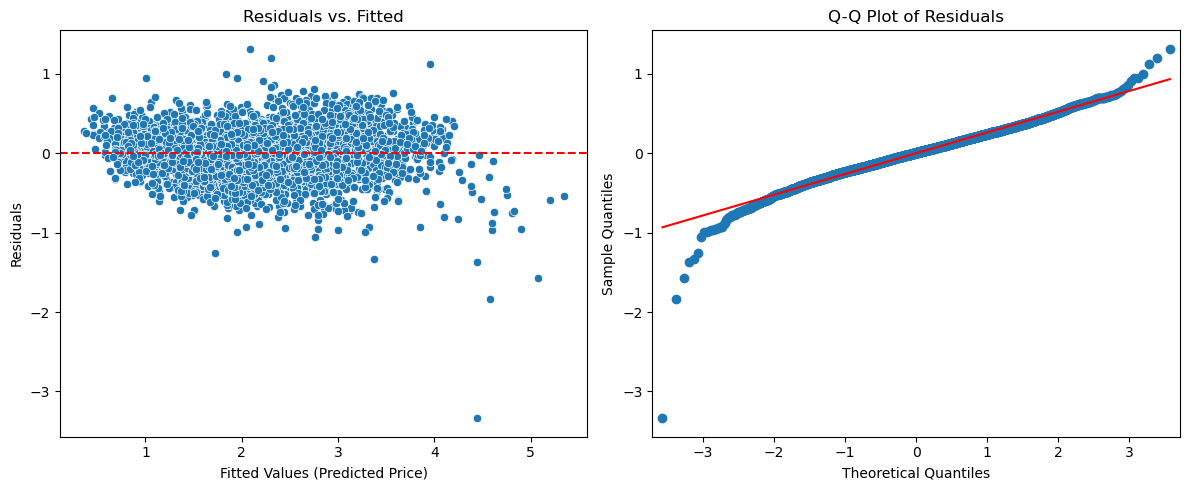

In [697]:
fitted_values = model_slr_3.fittedvalues
residuals = model_slr_3.resid

plt.figure(figsize=(12, 5))

# 1. Residuals vs. Fitted Plot
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(x=fitted_values, y=residuals, ax=ax1)
ax1.axhline(0, color='red', linestyle='--')
ax1.set_title('Residuals vs. Fitted')
ax1.set_xlabel('Fitted Values (Predicted Price)')
ax1.set_ylabel('Residuals')

# 2. Q-Q Plot
ax2 = plt.subplot(1, 2, 2)
sm.qqplot(residuals, line='s', ax=ax2)
ax2.set_title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

#### Conclusioni

Il modello risultante sembra avere delle buone perfomance, spiega molta della varianza all'interno del dataset come si può vedere da R-squared.

I predittori più potenti sono 'Age' e 'Power', indicando come l'età dell'auto e la sua potenza "fanno" il prezzo, più l'auto è giovane e potente e mmaggiore il prezzo di vendita.

Hanno un ottimo contributo anche il tipo di carburante e il tipo di trasmissione, più precisamente se un auto è alimentata a Diesel e ha un cambio Automatico, allora il prezzo sarà più alto.

La nostra sorpresa è l'impatto poco rilevante che ha il tipo di propreitario, pensavamo che un auto che avesse avuto più di due proprietari si sarebbe svalutata molto di più, invece questa accade di più se l'auto è vecchia, indicando nuovamente l'importanda di 'Age'.

Il nostro timore sta in un possibile overfitting dato dall'uso della variabile 'Brand', noonostante la categorizzazione delle auto, ricordiamo che per questa variabile abbiamo usato la tecnica del one-hot-encoding. 

Tuttavia il modello non riesce a spiegare alcuni prezzi.


## 2.2 Analisi Predittiva e Machine Learning

Adesso l'obiettivo è creare un modello predittivo che funzioni su dati nuovi e mai visti.

Potremmo applicare questo modello in un tool per capire a quale prezzo mettere in vendita un automobile usata in una data zona geografica: l'India in questo caso.

Partiremo dal modello utilizzato per la fase di Understanding.

Una limitazione del modello attuale è la dipendenza dalla variabile 'Brand'. In fase di produzione, per gestire brand non presenti nel set di addestramento, si è prevista la strategia di raggruppamento delle classi meno frequenti in una categoria 'Other' o l'utilizzo di un encoder capace di ignorare input sconosciuti, garantendo la robustezza del sistema.

### Data Splitting e Processing per ML

Da adesso è importante la performance sui dati nuovi e mai visti, per questo adesso divideremo il nostro dataset in 3 parti:
- Train set, il più massiccio, conterrà il 60% delle osservazioni, sarà il set su cui alleneremo i nostri modelli.
- Validation set, coprirà il 20% del dataset, servirà come primo test sul train set, servirà anche a settare i nostri iperparametri.
- Test set, coprirà il 20% del dataset, servirà come test finale sul nostr modello che consideriamo ottimale, allenato sull'unione tra train e validation

Inoltre converrebbe trasformare i nostri dati in modo che possano essere letti meglio dai nostri modelli:
- Trasformazioni logaritmiche: si vuile aplicare una trasformazione logaritmica a 'Kilometers_Driven', 'Engine' e 'Power, perché hanno una distribuzione che si discosta troppo dalla normale e il nostro modello riuscirà a leggere in modo migliore.
- Applichiamo lo scaling a tutte le nostre variabili continue in modo che

Con queste modifiche abbiamo perso molto della nostra possibilità di comprendere i coefficienti, ma avremo un miglioramento delle performance.

In [698]:
# 1. Setup del dataset e variabili
y = df['Price']
vars_to_use = ['Age', 'Engine', 'Power', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Kilometers_Driven', 'Mileage', 'Brand_Category'] 
X = df[vars_to_use].copy()

# 2. Trasformazione logaritmica (Si può fare prima dello split perché è puntuale)
X['Kilometers_Driven'] = np.log1p(X['Kilometers_Driven'])
X['Engine'] = np.log1p(X['Engine'])
X['Power'] = np.log1p(X['Power'])

# 3. Otteniamo le variabili dummies (Su tutto X per garantire coerenza di colonne)
X = pd.get_dummies(X, columns=['Fuel_Type', 'Transmission', 'Owner_Type', 'Brand_Category'], drop_first=True, dtype=int)

In [699]:
from sklearn.model_selection import train_test_split

# Primo split: TrainVal e Test
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Secondo split: Train e Validation
# Nota: per mantenere le proporzioni corrette (0.6, 0.2, 0.2), qui usiamo 0.25 su X_trainval
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=42)

print("Sets Proportions:")
print(f"X_trainval:\t{X_trainval.shape}\t Prop: {X_trainval.shape[0]/X.shape[0]:.1f}")
print(f"X_train:\t{X_train.shape}\t Prop: {X_train.shape[0]/X.shape[0]:.1f}")
print(f"X_val:\t\t{X_val.shape}\t Prop: {X_val.shape[0]/X.shape[0]:.1f}")
print(f"X_test:\t\t{X_test.shape}\t Prop: {X_test.shape[0]/X.shape[0]:.1f}")

Sets Proportions:
X_trainval:	(4567, 13)	 Prop: 0.8
X_train:	(3425, 13)	 Prop: 0.6
X_val:		(1142, 13)	 Prop: 0.2
X_test:		(1142, 13)	 Prop: 0.2


Abbiamo implementato una pipeline di preprocessing rigorosa: le trasformazioni logaritmiche e la codifica delle variabili dummy sono state eseguite sull'intero dataset per garantire la consistenza dimensionale delle feature. Successivamente, abbiamo diviso i dati in Train, Validation e Test (60/20/20). La standardizzazione è stata calibrata esclusivamente sul set di addestramento per prevenire fenomeni di data leakage.

In [700]:
# 5. Data Normalization (Scaling)
cols_to_scale = ['Age', 'Engine', 'Power', 'Kilometers_Driven', 'Mileage']
scaler = StandardScaler()

X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])

X_val[cols_to_scale] = scaler.transform(X_val[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

#### Regressione Polinomiale

Spiegazione su quello che andremo a fare.

Adesso andiamo a crere un modello linare, in modo da poterlo confrontare con il nostro modello polinomiae futuro.

In [701]:
from sklearn.linear_model import LinearRegression

# 4. Creiamo un modello di Regressione Lineare
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Stampiamo di coefficienti
print(linear_regressor.coef_)
print(linear_regressor.intercept_)

[-0.31173852  0.12339626  0.23365954 -0.02757116 -0.07320725 -0.19117813
 -0.08466032 -0.04328349 -0.11980686 -0.08364781  0.49279712 -0.14513601
  0.42652979]
2.2014423517557216


Adesso confrontiamo le performance sia sul Validation set e sia sul Training set.

In [702]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error

# Produciamo le previsioni sul val_set
y_val_pred = linear_regressor.predict(X_val)

# 5. Metriche sul Validation Set
mae_val = mean_absolute_error(y_val, y_val_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
rmse_val = root_mean_squared_error(y_val, y_val_pred)

y_train_pred = linear_regressor.predict(X_train)

mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = root_mean_squared_error(y_train, y_train_pred)

print("Performance")
print("{:>12s} {:>12s} {:>12s} {:>12s} {:>12s} {:>12s}"
      .format("Set", "MAE", "MSE", "RMSE", "y Mean", "y Std"))

print("{:>12s} {:>12.5f} {:>12.5f} {:>12.5f} {:>12.5f} {:>12.5f}"
      .format("Val", mae_val, mse_val, rmse_val,
              y_val.mean(), y_val.std()))

print("{:>12s} {:>12.5f} {:>12.5f} {:>12.5f} {:>12.5f} {:>12.5f}"
      .format("Train", mae_train, mse_train, rmse_train,
              y_train.mean(), y_train.std()))



Performance
         Set          MAE          MSE         RMSE       y Mean        y Std
         Val      0.17314      0.05080      0.22538      2.03137      0.71295
       Train      0.17158      0.05052      0.22477      2.05477      0.72923


Osservazioni:
- Val set e Train set hanno risultati molto simili, questo è ottimo perché significa che non c'è rischio di overfitting
- In entrambi i casu RMSE > MAE: vuol dire che ci sono pochi errori grandi, il modello non commette errori troppo enormi

Non sembrano esserci differenze sostanziali. Anzi sembra comportarsi peggio sul Train set rispetto il Validation set, 

Brand è la variabile che ci preoccupa maggiormente, andiamo a testare un modello che non la includa:

In [703]:
# 7. Conserviamo i risultati
auto_usate_result = pd.DataFrame({
    'Method': ['Linear Regression'],
    'Validation': ['Validation Set'],
    'Parameters': [''],
    'MAE': [mae_val],
    'MSE': [mse_val],
    'RMSE': [rmse_val]
})

auto_usate_result

,Method,Validation,Parameters,MAE,MSE,RMSE
0,Linear Regression,Validation Set,,0.173142,0.050798,0.225384


#### Regressione Polinomiale

Adesso andiamo a catturare quelle relazioni non lineari. In questo tipo di algoritmo è necessario andare a cercare il valore adatto dell'iperparametro k, ovvero il grado del polinomio. Se troppo basso cadiamo nell'underfitting perché non riusciamo a catturare la curva, al contrario se troppo alto cadiamo nell'overfitting.

Andremo ad usare K-Fold Cross Validation per andare a trovare i giusti iperparametri, con un k di 5.

In [704]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

# Bisogna impostare la pipeline
polynomial_regressor = Pipeline([
    ('polynomial_expansion', PolynomialFeatures()),
    ('ridge_regression', Ridge())
])

poly_grid = {
    'polynomial_expansion__degree': [1, 2, 3]
}

metrics = {
    'MAE': 'neg_mean_absolute_error',
    'MSE': 'neg_mean_squared_error',
    'RMSE': 'neg_root_mean_squared_error'
}

gs_poly = GridSearchCV(
    polynomial_regressor,
    param_grid=poly_grid,
    scoring=metrics,
    cv=5,
    refit='MSE'
)

gs_poly.fit(X_trainval, y_trainval)

best_degree = gs_poly.best_params_['polynomial_expansion__degree']
print(f"Grado ottimale (via CV): {best_degree}")


Grado ottimale (via CV): 2


Abbiamo trovato il grado k=2 ottimale, adesso conserviamo i risultati:

In [705]:

results_df = pd.DataFrame(gs_poly.cv_results_)

best_index = gs_poly.best_index_

best_mae = results_df.loc[best_index, 'mean_test_MAE'] * -1
best_mse = results_df.loc[best_index, 'mean_test_MSE'] * -1
best_rmse = results_df.loc[best_index, 'mean_test_RMSE'] * -1
best_degree_poly = results_df.loc[best_index, 'param_polynomial_expansion__degree']

auto_usate_result = pd.concat([
    auto_usate_result,
    pd.DataFrame({
        'Method': ['Polynomial Regression'],
        'Validation': ['K-Fold CV: 5'],
        'Parameters': [f'Degree: {best_degree_poly}'],
        'MAE': [best_mae],
        'MSE': [best_mse],
        'RMSE': [best_rmse]
    })
], ignore_index=True)

auto_usate_result

,Method,Validation,Parameters,MAE,MSE,RMSE
0,Linear Regression,Validation Set,,0.173142,0.050798,0.225384
1,Polynomial Regression,K-Fold CV: 5,Degree: 2,0.156607,0.043010,0.206912


#### Regressione Ridge

Dopo aver esplorato la complessità del modello con la regressione polinomiale, il passo successivo è l'ottimizzazione tramite la Regolarizzazione Ridge.

Man mano che aumentiamo il grado del polinomio, il modello tende a diventare troppo "sensibile" ai singoli dati, rischiando l'overfitting. La regressione Ridge interviene come un "filtro di stabilità": invece di eliminare le variabili, ne ridimensiona i coefficienti, rendendo il modello più robusto e meno propenso a oscillazioni drastiche causate da valori anomali (outlier) o dal rumore nei dati.

Ho scelto questi valori di alpha per coprire diverse intensita di regolarizzazione attraverso una scala che va da una correzione quasi nulla a una molto aggressiva. Nello specifico, i valori piu bassi come 0.1 e 1 servono a testare se basta una leggera pressione sui coefficienti per stabilizzare il modello senza perdere informazioni. Valori intermedi come 10, 50 e 100 sono lo standard per dataset di medie dimensioni come il nostro, mentre i valori piu alti da 200 a 1000 servono a verificare se il modello ha una forte tendenza all overfitting che richiede di schiacciare drasticamente i pesi delle variabili verso lo zero. Questa progressione permette alla GridSearch di identificare il punto di equilibrio ottimale tra semplicita e precisione.

In [706]:
from sklearn.linear_model import Ridge

# Bisogna impostare la pipeline
polynomial_regressor = Pipeline([
    ('polynomial_expansion', PolynomialFeatures()),
    ('ridge_regression', Ridge())
])

ridge_param_grid = {
    'polynomial_expansion__degree': [best_degree_poly], # Usiamo il grado trovato prima
    'ridge_regression__alpha': [0.1, 1, 10, 50, 100, 200, 400, 600, 1000]
}

# 2. Setup della GridSearchCV per Ridge
gs_ridge = GridSearchCV(
    polynomial_regressor,
    param_grid=ridge_param_grid,
    scoring=metrics,
    cv=5,
    refit='MSE'
)

# 3. Fit sul set di sviluppo
gs_ridge.fit(X_trainval, y_trainval)

# 4. Estrazione dei risultati migliori
best_alpha = gs_ridge.best_params_['ridge_regression__alpha']
best_index_ridge = gs_ridge.best_index_
results_ridge_df = pd.DataFrame(gs_ridge.cv_results_)

best_mae_ridge = results_ridge_df.loc[best_index_ridge, 'mean_test_MAE'] * -1
best_mse_ridge = results_ridge_df.loc[best_index_ridge, 'mean_test_MSE'] * -1
best_rmse_ridge = results_ridge_df.loc[best_index_ridge, 'mean_test_RMSE'] * -1

print(f"Miglior Alpha trovato: {best_alpha}")

# 5. AGGIORNAMENTO DELLA TABELLA (Senza rimuovere i vecchi dati)
new_row_ridge = pd.DataFrame({
    'Method': ['Ridge Regression'],
    'Validation': ['K-Fold CV: 5'],
    'Parameters': [f'Degree: {best_degree}, Alpha: {best_alpha}'],
    'MAE': [best_mae_ridge],
    'MSE': [best_mse_ridge],
    'RMSE': [best_rmse_ridge]
})

auto_usate_result = pd.concat([auto_usate_result, new_row_ridge], ignore_index=True)

# Visualizziamo il confronto
auto_usate_result.round(5)

Miglior Alpha trovato: 0.1


,Method,Validation,Parameters,MAE,MSE,RMSE
0,Linear Regression,Validation Set,,0.17314,0.05080,0.22538
1,Polynomial Regression,K-Fold CV: 5,Degree: 2,0.15661,0.04301,0.20691
2,Ridge Regression,K-Fold CV: 5,"Degree: 2, Alpha: 0.1",0.15568,0.04264,0.20602


Ridge ci indica che basta una leggera regolarizzazione per stabilizzare il nostro modello, basta un alpha  0.1.

#### Lasso Regression

In [707]:
from sklearn.linear_model import Lasso

# 1. Setup della Pipeline per Lasso
# Usiamo max_iter=10000 per assicurarci che l'algoritmo arrivi a convergenza
lasso_regressor = Pipeline([
    ('polynomial_expansion', PolynomialFeatures()),
    ('lasso_regression', Lasso(max_iter=10000))
])

# Parametri per Lasso: cerchiamo in un range più piccolo e granulare
lasso_param_grid = {
    'polynomial_expansion__degree': [best_degree_poly], 
    'lasso_regression__alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1]
}

# 2. Setup della GridSearchCV per Lasso
gs_lasso = GridSearchCV(
    lasso_regressor,
    param_grid=lasso_param_grid,
    scoring=metrics,
    cv=5,
    refit='MSE'
)

# 3. Fit sul set di sviluppo
gs_lasso.fit(X_trainval, y_trainval)

# 4. Estrazione dei risultati migliori
best_alpha_lasso = gs_lasso.best_params_['lasso_regression__alpha']
best_index_lasso = gs_lasso.best_index_
results_lasso_df = pd.DataFrame(gs_lasso.cv_results_)

best_mae_lasso = results_lasso_df.loc[best_index_lasso, 'mean_test_MAE'] * -1
best_mse_lasso = results_lasso_df.loc[best_index_lasso, 'mean_test_MSE'] * -1
best_rmse_lasso = results_lasso_df.loc[best_index_lasso, 'mean_test_RMSE'] * -1

print(f"Miglior Alpha trovato per Lasso: {best_alpha_lasso}")
print(f"MAE con Lasso: {best_mae_lasso:.5f}")

# 5. AGGIORNAMENTO DELLA TABELLA (Senza rimuovere i vecchi dati)
new_row_lasso = pd.DataFrame({
    'Method': ['Lasso Regression'],
    'Validation': ['K-Fold CV: 5'],
    'Parameters': [f'Degree: {best_degree}, Alpha: {best_alpha_lasso}'],
    'MAE': [best_mae_lasso],
    'MSE': [best_mse_lasso],
    'RMSE': [best_rmse_lasso]
})

auto_usate_result = pd.concat([auto_usate_result, new_row_lasso], ignore_index=True)

# Visualizziamo il confronto finale
auto_usate_result.round(5)

/home/greco/universita/fad/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.059e+01, tolerance: 1.906e-01
  model = cd_fast.enet_coordinate_descent(
/home/greco/universita/fad/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.839e+01, tolerance: 1.963e-01
  model = cd_fast.enet_coordinate_descent(
/home/greco/universita/fad/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or

Miglior Alpha trovato per Lasso: 0.0001
MAE con Lasso: 0.15721


/home/greco/universita/fad/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.518e+01, tolerance: 2.401e-01
  model = cd_fast.enet_coordinate_descent(


,Method,Validation,Parameters,MAE,MSE,RMSE
0,Linear Regression,Validation Set,,0.17314,0.05080,0.22538
1,Polynomial Regression,K-Fold CV: 5,Degree: 2,0.15661,0.04301,0.20691
2,Ridge Regression,K-Fold CV: 5,"Degree: 2, Alpha: 0.1",0.15568,0.04264,0.20602
3,Lasso Regression,K-Fold CV: 5,"Degree: 2, Alpha: 0.0001",0.15721,0.04332,0.20763
